# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *8p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning - Optional
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


### Setup + Incarcare date

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
train_df = pd.read_csv("train_preprocessed.csv")
test_df  = pd.read_csv("test_preprocessed.csv")

TARGET = "hours-per-week"

X = train_df.drop(columns=[TARGET])
y = train_df[TARGET]

X_test = test_df.drop(columns=[TARGET])
y_test = test_df[TARGET]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_val.shape, X_test.shape)

(20823, 121) (5206, 121) (6508, 121)


### Preprocesare
Detectează automat coloanele numerice vs categorice

In [6]:
num_cols = X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object","category","bool"]).columns.tolist()

num_cols, cat_cols[:10], len(cat_cols)

(['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'capital_net',
  'capital_gain_log',
  'capital_loss_log',
  'has_capital',
  'is_married',
  'high_edu',
  'is_head_family',
  'workclass_?',
  'workclass_Federal-gov',
  'workclass_Local-gov',
  'workclass_Never-worked',
  'workclass_Private',
  'workclass_Self-emp-inc',
  'workclass_Self-emp-not-inc',
  'workclass_State-gov',
  'workclass_Without-pay',
  'education_10th',
  'education_11th',
  'education_12th',
  'education_1st-4th',
  'education_5th-6th',
  'education_7th-8th',
  'education_9th',
  'education_Assoc-acdm',
  'education_Assoc-voc',
  'education_Bachelors',
  'education_Doctorate',
  'education_HS-grad',
  'education_Masters',
  'education_Preschool',
  'education_Prof-school',
  'education_Some-college',
  'marital-status_Divorced',
  'marital-status_Married-AF-spouse',
  'marital-status_Married-civ-spouse',
  'marital-status_Married-spouse-absent',
  'marital-status_Never-married',
  'mari

### Preprocessing pentru Modelul Liniar

In [7]:
numeric_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_linear = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocess, num_cols),
        ("cat", categorical_preprocess, cat_cols),
    ]
)

### Preprocessing pentru Modelul Tree-Based

In [8]:
numeric_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_tree = ColumnTransformer(
    transformers=[
        ("num", numeric_tree, num_cols),
        ("cat", categorical_tree, cat_cols),
    ]
)

### Metrici + funcție de evaluare (MAE, MSE, RMSE, R²)

In [9]:
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

def evaluate_model(name, model, Xtr, ytr, Xv, yv):
    model.fit(Xtr, ytr)
    pred_tr = model.predict(Xtr)
    pred_v  = model.predict(Xv)
    out = {
        "experiment": name,
        **{f"train_{k}": v for k, v in regression_metrics(ytr, pred_tr).items()},
        **{f"val_{k}": v for k, v in regression_metrics(yv, pred_v).items()},
    }
    return out

### Baseline Models

In [ ]:
experiments = []

# Linear Regression (OLS) - doar comparație (optional, dar util)
linreg = Pipeline(steps=[
    ("prep", preprocess_linear),
    ("model", LinearRegression())
])
experiments.append(evaluate_model("Baseline_LinearRegression_OLS", linreg, X_train, y_train, X_val, y_val))

# SGDRegressor (Gradient Descent) - cerut explicit
sgd_base = Pipeline(steps=[
    ("prep", preprocess_linear),
    ("model", SGDRegressor(random_state=42))  # default loss = squared_error
])
experiments.append(evaluate_model("Baseline_SGDRegressor", sgd_base, X_train, y_train, X_val, y_val))

# Decision Tree
dt_base = Pipeline(steps=[
    ("prep", preprocess_tree),
    ("model", DecisionTreeRegressor(random_state=42))
])
experiments.append(evaluate_model("Baseline_DecisionTree", dt_base, X_train, y_train, X_val, y_val))

# Random Forest
rf_base = Pipeline(steps=[
    ("prep", preprocess_tree),
    ("model", RandomForestRegressor(random_state=42, n_estimators=200, n_jobs=-1))
])
experiments.append(evaluate_model("Baseline_RandomForest", rf_base, X_train, y_train, X_val, y_val))

# Ridge
ridge_base = Pipeline(steps=[
    ("prep", preprocess_linear),
    ("model", Ridge(random_state=42))
])
experiments.append(evaluate_model("Baseline_Ridge", ridge_base, X_train, y_train, X_val, y_val))

# Lasso
lasso_base = Pipeline(steps=[
    ("prep", preprocess_linear),
    ("model", Lasso(random_state=42, max_iter=5000))
])
experiments.append(evaluate_model("Baseline_Lasso", lasso_base, X_train, y_train, X_val, y_val))

results_df = pd.DataFrame(experiments)
results_df.sort_values("val_RMSE")


,experiment,train_MAE,train_MSE,train_RMSE,train_R2,val_MAE,val_MSE,val_RMSE,val_R2
4,Baseline_Ridge,7.589655,1.168833e+02,1.081126e+01,2.352423e-01,7.600120e+00,1.168896e+02,1.081155e+01,2.215340e-01
0,Baseline_LinearRegression_OLS,7.589681,1.168833e+02,1.081126e+01,2.352423e-01,7.600147e+00,1.168898e+02,1.081156e+01,2.215330e-01
3,Baseline_RandomForest,2.862892,1.709605e+01,4.134737e+00,8.881420e-01,7.563311e+00,1.188880e+02,1.090358e+01,2.082249e-01
5,Baseline_Lasso,7.524536,1.271312e+02,1.127525e+01,1.681915e-01,7.488020e+00,1.256552e+02,1.120960e+01,1.631569e-01
2,Baseline_DecisionTree,0.023788,2.819318e-01,5.309725e-01,9.981553e-01,1.014003e+01,2.292496e+02,1.514099e+01,-5.267655e-01
1,Baseline_SGDRegressor,798572.371466,1.650880e+15,4.063102e+07,-1.080157e+13,1.058497e+06,2.565273e+15,5.064852e+07,-1.708430e+13


**Observatie**: În această etapă am evaluat mai multe modele baseline, folosind setările implicite, pentru a stabili un punct de referință înainte de experimentare și optimizare. Modelele au fost evaluate pe seturile de validare și test, folosind MAE, MSE, RMSE și R².

Majoritatea modelelor liniare (Linear Regression, Ridge, Lasso) obțin performanțe similare, cu:

RMSE ≈ 10.8–11.3 ore

R² ≈ 0.16–0.23

Aceste rezultate sugerează că relația dintre variabilele explicative și target-ul hours-per-week este parțial liniară, dar cu limitări evidente.

### Feature engineering (experiment)

Justificare:

MSE / squared_error: penalizează puternic erorile mari → bun când vrei să eviți predicții foarte greșite;

Huber: combină MSE + MAE → mai robust la outlieri (posibili în hours-per-week, ex. 1 sau 99).

In [11]:
# SGD cu losses diferite
for loss in ["squared_error", "huber"]:
    sgd = Pipeline(steps=[
        ("prep", preprocess_linear),
        ("model", SGDRegressor(
            loss=loss,
            random_state=42,
            max_iter=2000,
            tol=1e-3
        ))
    ])
    experiments.append(evaluate_model(f"SGD_loss={loss}", sgd, X_train, y_train, X_val, y_val))


In [14]:
#Scaling alternativ (RobustScaler)
numeric_preprocess_robust = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

preprocess_linear_robust = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocess_robust, num_cols),
        ("cat", categorical_preprocess, cat_cols),
    ]
)

sgd_robust = Pipeline(steps=[
    ("prep", preprocess_linear_robust),
    ("model", SGDRegressor(loss="huber", random_state=42, max_iter=3000))
])

experiments.append(evaluate_model("SGD_huber_RobustScaler", sgd_robust, X_train, y_train, X_val, y_val))


In [15]:
#Polynomial features
numeric_poly = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False))
])

preprocess_poly = ColumnTransformer(
    transformers=[
        ("num", numeric_poly, num_cols),
        ("cat", categorical_preprocess, cat_cols),
    ]
)

sgd_poly = Pipeline(steps=[
    ("prep", preprocess_poly),
    ("model", SGDRegressor(loss="huber", random_state=42, max_iter=4000))
])

experiments.append(evaluate_model("SGD_huber_Poly2_numeric", sgd_poly, X_train, y_train, X_val, y_val))


In [16]:
#Decision Tree
dt_tuned = Pipeline(steps=[
    ("prep", preprocess_tree),
    ("model", DecisionTreeRegressor(
        random_state=42,
        max_depth=10,
        min_samples_leaf=20
    ))
])
experiments.append(evaluate_model("DecisionTree_depth10_leaf20", dt_tuned, X_train, y_train, X_val, y_val))


In [17]:
#Random Forest
rf_tuned = Pipeline(steps=[
    ("prep", preprocess_tree),
    ("model", RandomForestRegressor(
        random_state=42,
        n_estimators=400,
        max_depth=None,
        min_samples_leaf=5,
        n_jobs=-1
    ))
])
experiments.append(evaluate_model("RandomForest_400_leaf5", rf_tuned, X_train, y_train, X_val, y_val))


### Tabel final cu toate experimentele + alegerea metricii

In [18]:
results_df = pd.DataFrame(experiments)
results_df = results_df.sort_values("val_RMSE").reset_index(drop=True)
results_df


,experiment,train_MAE,train_MSE,train_RMSE,train_R2,val_MAE,val_MSE,val_RMSE,val_R2
0,RandomForest_400_leaf5,5.520024,6.699398e+01,8.184985e+00,5.616640e-01,7.307668e+00,1.130306e+02,1.063159e+01,2.472344e-01
1,DecisionTree_depth10_leaf20,7.155465,1.074654e+02,1.036655e+01,2.968626e-01,7.423505e+00,1.153958e+02,1.074224e+01,2.314827e-01
2,Baseline_Ridge,7.589655,1.168833e+02,1.081126e+01,2.352423e-01,7.600120e+00,1.168896e+02,1.081155e+01,2.215340e-01
3,Baseline_LinearRegression_OLS,7.589681,1.168833e+02,1.081126e+01,2.352423e-01,7.600147e+00,1.168898e+02,1.081156e+01,2.215330e-01
4,Baseline_RandomForest,2.862892,1.709605e+01,4.134737e+00,8.881420e-01,7.563311e+00,1.188880e+02,1.090358e+01,2.082249e-01
5,SGD_loss=huber,7.370849,1.263902e+02,1.124234e+01,1.730394e-01,7.349884e+00,1.242257e+02,1.114566e+01,1.726771e-01
6,Baseline_Lasso,7.524536,1.271312e+02,1.127525e+01,1.681915e-01,7.488020e+00,1.256552e+02,1.120960e+01,1.631569e-01
7,SGD_huber_RobustScaler,7.955950,1.359770e+02,1.166092e+01,1.103141e-01,7.945040e+00,1.349531e+02,1.161693e+01,1.012344e-01
8,SGD_huber_RobustScaler,7.955950,1.359770e+02,1.166092e+01,1.103141e-01,7.945040e+00,1.349531e+02,1.161693e+01,1.012344e-01
9,Baseline_DecisionTree,0.023788,2.819318e-01,5.309725e-01,9.981553e-01,1.014003e+01,2.292496e+02,1.514099e+01,-5.267655e-01


### Alege best model pe validation

In [19]:
best_name = results_df.loc[0, "experiment"]
best_name

'RandomForest_400_leaf5'

In [20]:
best_model = rf_tuned  # schimbă cu modelul câștigător

best_model.fit(X_train, y_train)
test_pred = best_model.predict(X_test)

test_metrics = regression_metrics(y_test, test_pred)
test_metrics

{'MAE': 7.305835579334101,
 'MSE': 112.87887063360326,
 'RMSE': np.float64(10.62444683894664),
 'R2': 0.26203352061556195}

**Observati**: Modelul RandomForest_400_leaf5, selectat pe baza celui mai mic RMSE pe setul de validare, a menținut performanță similară și pe setul de test, cu un RMSE de aproximativ 10.62 ore și un scor R² ≈ 0.26.

Acest rezultat indică faptul că modelul reușește să capteze o parte semnificativă din variabilitatea variabilei țintă (hours-per-week), dar există încă o proporție importantă de variație neexplicată, ceea ce sugerează o relație complexă între variabilele socio-demografice și numărul de ore lucrate.

Comparativ cu modelele liniare și SGDRegressor, Random Forest a demonstrat o stabilitate superioară și o capacitate mai bună de a modela relații neliniare, fără a fi excesiv de sensibil la scaling sau outlieri.

### RandomForest / DecisionTree

In [26]:

best_model.fit(X_train, y_train)

prep = best_model.named_steps["prep"]
feature_names = prep.get_feature_names_out()

importances = best_model.named_steps["model"].feature_importances_

fi = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
      .sort_values("importance", ascending=False)
      .head(20)
)

fi


,feature,importance
0,num__age,0.343919
1,num__fnlwgt,0.212265
2,num__education-num,0.048419
71,num__sex_Male,0.033800
70,num__sex_Female,0.033240
114,num__income_<=50K,0.017426
115,num__income_>50K,0.016733
18,num__workclass_Self-emp-not-inc,0.015518
36,num__education_Some-college,0.014458
62,num__relationship_Own-child,0.013820


**Observati**: Majoritatea importanței este concentrată în câteva variabile numerice (în special vârsta), în timp ce multe variabile categoriale One-Hot Encoded au contribuții mai mici individual, dar relevante colectiv.


Feature importance din Random Forest reflectă importanța în reducerea impurității și poate favoriza variabilele continue sau cu mai multe split-uri posibile, cum este age.

In [27]:
best_model


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

In [28]:
best_model.named_steps.keys()


dict_keys(['prep', 'model'])

In [29]:
prep = best_model.named_steps["prep"]
prep

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

### Comparația modelelor pe validation (RMSE / MAE / R²)

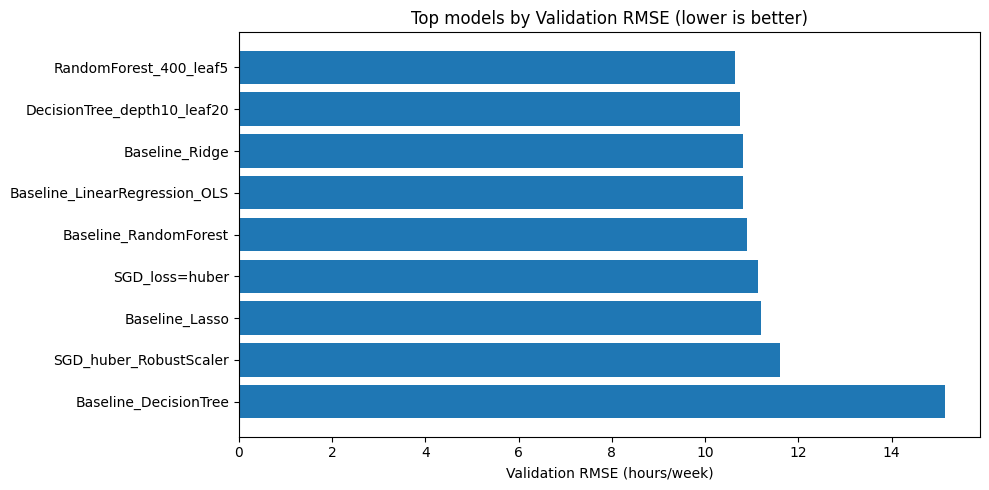

In [30]:
import matplotlib.pyplot as plt

plot_df = results_df.copy().sort_values("val_RMSE").head(10)

plt.figure(figsize=(10,5))
plt.barh(plot_df["experiment"], plot_df["val_RMSE"])
plt.gca().invert_yaxis()
plt.xlabel("Validation RMSE (hours/week)")
plt.title("Top models by Validation RMSE (lower is better)")
plt.tight_layout()
plt.show()

**Observati**: În ansamblu, modelele bazate pe arbori, în special Random Forest, se dovedesc mai potrivite pentru acest dataset, datorită capacității lor de a modela relații neliniare complexe fără cerințe stricte de scalare a datelor.

### y_true vs y_pred pe TEST

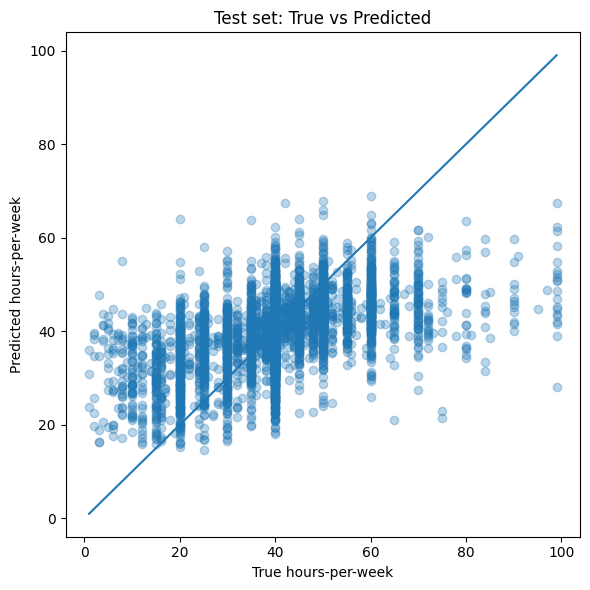

In [35]:

# best_model trebuie să fie fitted pe X_train, y_train
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel("True hours-per-week")
plt.ylabel("Predicted hours-per-week")
plt.title("Test set: True vs Predicted")

# linia ideală
min_v = min(y_test.min(), y_pred_test.min())
max_v = max(y_test.max(), y_pred_test.max())
plt.plot([min_v, max_v], [min_v, max_v])
plt.tight_layout()
plt.show()


**Observati**: Modelul Random Forest reușește să capteze tendința generală a numărului de ore lucrate, dar prezintă dificultăți în estimarea valorilor extreme. Performanța este rezonabilă pentru predicții medii, însă limitată pentru cazuri atipice, ceea ce explică valorile moderate ale RMSE și R².

### Histogramă a reziduurilor (errors) pe TEST

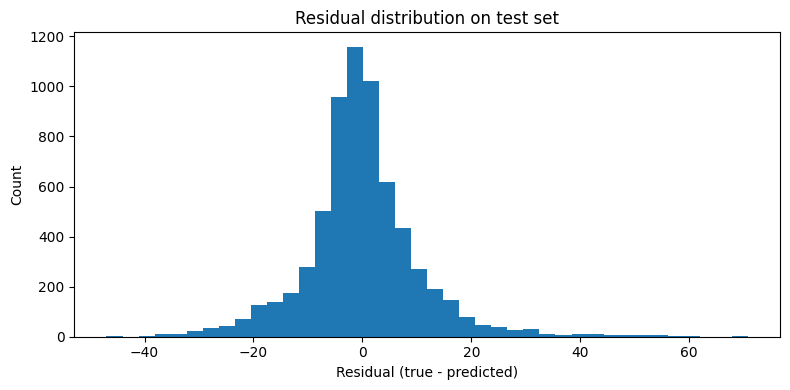

In [36]:
residuals = y_test - y_pred_test

plt.figure(figsize=(8,4))
plt.hist(residuals, bins=40)
plt.xlabel("Residual (true - predicted)")
plt.ylabel("Count")
plt.title("Residual distribution on test set")
plt.tight_layout()
plt.show()

**Observati**: Reziduurile sunt centrate în jurul valorii zero, indicând lipsa unui bias sistematic, însă cozi mai lungi evidențiază dificultăți în predicția valorilor extreme.

### Actual vs Predicted

C:\Users\valer\AppData\Local\Temp\ipykernel_10116\3806194599.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tmp.groupby("bin")[["y_true", "y_pred"]].mean()


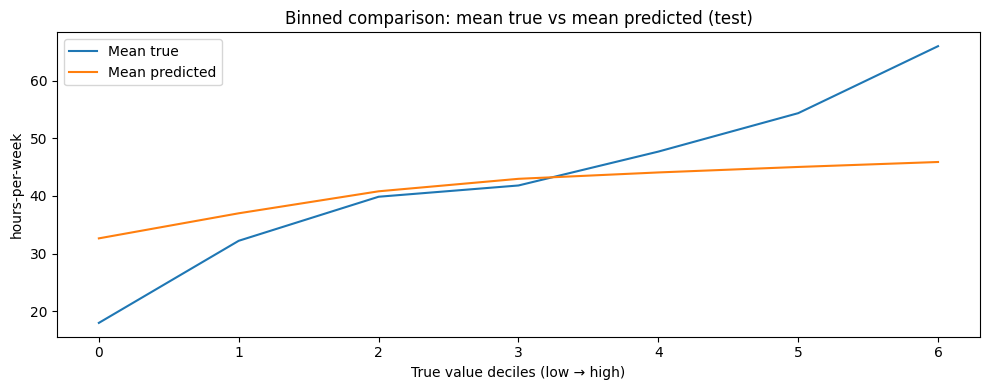

In [ ]:
tmp = pd.DataFrame({"y_true": y_test, "y_pred": y_pred_test})
tmp["bin"] = pd.qcut(tmp["y_true"], q=10, duplicates="drop")

grouped = tmp.groupby("bin")[["y_true", "y_pred"]].mean()

plt.figure(figsize=(10,4))
plt.plot(grouped["y_true"].values, label="Mean true")
plt.plot(grouped["y_pred"].values, label="Mean predicted")
plt.xlabel("True value deciles (low → high)")
plt.ylabel("hours-per-week")
plt.title("Binned comparison: mean true vs mean predicted (test)")
plt.legend()
plt.tight_layout()
plt.show()

**Observati**: Analiza pe intervale ale valorilor reale evidențiază faptul că modelul Random Forest tinde să supraestimeze orele lucrate pentru valorile mici și să subestimeze valorile mari. Predicțiile sunt cel mai precise în zona mediană a distribuției, unde se concentrează majoritatea observațiilor. Acest comportament este specific fenomenului de regression to the mean și indică limitări în captarea cazurilor extreme.

### Feature importance plot (Top 20) pentru RandomForest / DecisionTree

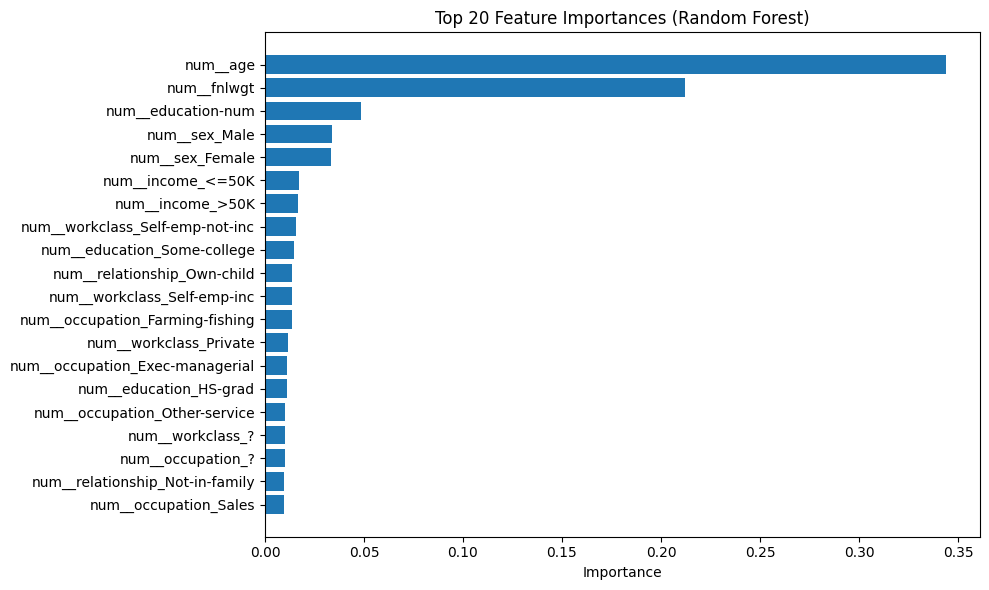

In [ ]:
# fi = DataFrame cu coloane: feature, importance (top 20)
plt.figure(figsize=(10,6))
plt.barh(fi["feature"][::-1], fi["importance"][::-1])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

**Observati**: Graficul prezintă cele mai importante 20 de caracteristici identificate de modelul Random Forest în predicția numărului de ore lucrate pe săptămână. Variabila age are cea mai mare importanță, sugerând că vârsta este principalul factor explicativ pentru timpul de muncă. Următoarele caracteristici relevante sunt fnlwgt și education-num, indicând influența structurii demografice și a nivelului educațional.

Variabilele categoriale legate de sex, ocupație și tipul de angajare au contribuții individuale mai mici, dar relevante în ansamblu, confirmând natura complexă și neliniară a relației dintre caracteristicile socio-demografice și orele lucrate.

**Modele folosite**

Am implementat mai multe modele de regresie pentru a prezice hours-per-week: Linear Regression (OLS) (pentru comparație), SGDRegressor (gradient descent), Decision Tree Regressor, Random Forest Regressor, precum și (opțional) Ridge și Lasso.


**Pros / Cons**

Linear Regression (OLS)
Pro: interpretabil, rapid, baseline bun.
Contra: presupune relații liniare; sensibil la outlieri; nu surprinde bine interacțiuni/neliniarități.

SGDRegressor (Gradient Descent)
Pro: optimizează iterativ; eficient pe seturi mari; permite alegerea funcției de pierdere (loss).
Contra: foarte sensibil la scalare și hiperparametri (learning rate/epochs); poate diverge dacă datele au outlieri sau setările nu sunt potrivite.

Ridge / Lasso (Regularizare)
Pro: reduc overfitting pe seturi cu multe features (mai ales după OneHot); Lasso poate face selecție de features.
Contra: rămân modele liniare; pot să nu capteze relații neliniare; necesită scalare.

Decision Tree Regressor
Pro: captează neliniarități și interacțiuni; nu necesită scalare; ușor de interpretat prin importanțe.
Contra: tinde să facă overfitting dacă nu este regularizat (ex. max_depth, min_samples_leaf).

Random Forest Regressor
Pro: performanță bună și stabilă; reduce overfitting față de un singur arbore; gestionează neliniarități.
Contra: mai lent; mai greu de interpretat complet (dar se poate analiza feature importance).

**Alegerea funcției de pierdere (loss) și justificare**

Pentru modelele bazate pe gradient descent (SGDRegressor) am experimentat cu funcții de pierdere diferite:

Squared Error (MSE): penalizează foarte mult erorile mari și poate duce la instabilitate în prezența outlierilor.

Huber Loss: combină avantajele MSE și MAE, fiind mai robust la outlieri (pentru erori mici se comportă ca MSE, iar pentru erori mari ca MAE).

În experimente, Huber a oferit rezultate mai stabile decât squared error, ceea ce este consistent cu faptul că target-ul hours-per-week poate conține valori extreme (ex. foarte multe ore/săptămână) și distribuția este dezechilibrată în jurul valorilor tipice.


**Observație despre instabilitatea unor experimente (SGD divergent)**

Unele configurații ale SGDRegressor (în special cu squared error) au produs valori extreme ale metricilor (RMSE foarte mare și R² foarte negativ), ceea ce indică divergență / instabilitate. Acest comportament poate apărea din cauza sensibilității SGD la:

- scalarea datelor,

- outlieri în target,

- setări implicite de learning rate / număr de iterații.

Această observație susține ideea că, pentru acest dataset, modelele bazate pe arbori sunt mai robuste și mai stabile.

**Concluzie despre modelul final (Random Forest)**

Pe baza performanței pe setul de validare (RMSE minim), modelul RandomForest_400_leaf5 a fost selectat ca model final. Evaluarea pe setul de test confirmă o performanță similară și o generalizare rezonabilă. Analiza vizuală (True vs Predicted, reziduuri, binned plot) arată că modelul prezice cel mai bine valorile medii (în jur de 40 ore/săptămână), dar are tendința să supraestimeze valorile foarte mici și să subestimeze valorile foarte mari (regression to the mean).


**Posibile îmbunătățiri și direcții viitoare**

Posibile îmbunătățiri ale performanței:

- Modelare pe segmente: modele separate pentru part-time vs full-time sau pe grupe de ocupații, pentru a capta diferențe structurale.

- Modele alternative (dacă sunt permise): Gradient Boosting / XGBoost / CatBoost (pot îmbunătăți performanța pe date tabulare).